# Session 1 & 2
Review Python
- import libraries
- print
- torch version
- cuda availability

In [1]:
import torch, numpy, matplotlib
a = 10
print(a)
print(f'Torch {a} version:{torch.__version__}')
print("Check if cuda is available:",torch.cuda.is_available())

10
Torch 10 version:2.8.0+cu126
Check if cuda is available: True


Review Python
- for
- square
- function

In [2]:
b = [i**2 for i in range(5)]
print(b)


[0, 1, 4, 9, 16]


In [3]:
def relu(x):
  return max(0,x)

y = [relu(i) for i in [0,2,3]]
print(y)

[0, 2, 3]


Review Python
- numpy
- arrays
- Elementwise multiply
- matrix multiply
- broadcast

In [4]:
import numpy as np
g = np.array([[1,2],[2,3]])
print(g)

[[1 2]
 [2 3]]


In [5]:
f = np.array([[2,6],[7,8]])
print("Elementwise multipliy:", f * g)

Elementwise multipliy: [[ 2 12]
 [14 24]]


In [6]:
h = f @ g
print("Matrix multiply:", h)

Matrix multiply: [[14 22]
 [23 38]]


In [7]:
k = np.array([10,30])
print(k)
print(g+k)

[10 30]
[[11 32]
 [12 33]]


# Exercise 1: Compute y= Wx + b with MSE loss.
- Define x, W and b
- write the formula
- Define target value
- Calculate loss and print
- x = [1 2], W = [2   , b = 1
                  3]

- Github


In [8]:
import numpy as np
x = np.array([[1,2]])
print(x)

[[1 2]]


In [9]:
W = np.array([[2],[3]])
print(W)
b = np.array([1])
print(b)

[[2]
 [3]]
[1]


In [10]:
y = x @ W + b
print(y)
target = 10
print(target)

[[9]]
10


In [11]:
loss = np.mean((y-target)**2)
print(loss)

1.0


# Pytorch
- tensor
- require grad
- .backward
- .item()
- .grad

In [12]:
import torch
x = torch.tensor([[1.0,2.0]],requires_grad= True)
print(x)
W = torch.tensor([[2.0],[3.0]], requires_grad= True)
b = torch. tensor ([1.0], requires_grad= True)
print("W=", W)
print("b=", b)
y = x @ W + b
y.backward()
print("dy/dW=", W.grad)
print("dy/db=", b.grad)

tensor([[1., 2.]], requires_grad=True)
W= tensor([[2.],
        [3.]], requires_grad=True)
b= tensor([1.], requires_grad=True)
dy/dW= tensor([[1.],
        [2.]])
dy/db= tensor([1.])


# Exercise 2: Linear Regression (Manual Gradient Descent)
- manual_seed()
- linspace(,,)
- unsqueeze()
- y = 2x + 1 + noise
- randn()
- size()
- plt.scatter()
- Initialize paramters
- Training Loop
- backward()
- Update parameters: .no_grad()
- .grad.zero_()
- .detach()
- plot, legend, show

In [13]:
torch.manual_seed(0)
x = torch.linspace(-3,3,100).unsqueeze(1)
# print(x)
y = 2*x + 1 + torch.randn(x.size())

In [14]:
W = torch.randn(1,1, requires_grad=True)
b= torch.zeros(1,requires_grad=True)
losses = []
lr = 0.01
for epoch in range(100):
  y_predicted = x @ W + b
  loss = torch.mean((y_predicted - y)**2)
  losses.append(loss.item())
  loss.backward()
  with torch.no_grad():
    W -= lr*W.grad
    b -= lr*b.grad
  W.grad.zero_()
  b.grad.zero_()

  print("Learned W:", W.item())
  print("Learned b:", b.item())

Learned W: 1.3646026849746704
Learned b: 0.02074282057583332
Learned W: 1.403469443321228
Learned b: 0.041070789098739624
Learned W: 1.4399571418762207
Learned b: 0.06099219620227814
Learned W: 1.47421133518219
Learned b: 0.08051517605781555
Learned W: 1.5063687562942505
Learned b: 0.09964769333600998
Learned W: 1.5365577936172485
Learned b: 0.11839756369590759
Learned W: 1.5648988485336304
Learned b: 0.13677243888378143
Learned W: 1.5915050506591797
Learned b: 0.1547798067331314
Learned W: 1.6164827346801758
Learned b: 0.17242702841758728
Learned W: 1.6399314403533936
Learned b: 0.18972131609916687
Learned W: 1.6619447469711304
Learned b: 0.20666971802711487
Learned W: 1.6826106309890747
Learned b: 0.22327914834022522
Learned W: 1.7020114660263062
Learned b: 0.23955638706684113
Learned W: 1.7202247381210327
Learned b: 0.25550809502601624
Learned W: 1.7373231649398804
Learned b: 0.2711407542228699
Learned W: 1.7533749341964722
Learned b: 0.2864607572555542
Learned W: 1.7684441804885864

# Exercise 3: Using nn.Linear and Optimizers
- Replace manual update
- nn.Linear()
- optimizer = torch.optim.SGD([W, b], lr=0.01)
- nn.MSELoss()
- optimizer.zero_grad()
- loss.backward()
- optimizer.step()
- optimizer.zero_grad()



In [15]:
from torch import nn
model = nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(), lr =0.01)
loss_function = nn.MSELoss()
for epoch in range(100):
  y_predicted2 = model(x)
  loss = loss_function (y_predicted2, y)
  opt.zero_grad()
  loss.backward()
  opt.step()
print("Learned W and b", [p.data for p in model.parameters()])

Learned W and b [tensor([[1.9967]]), tensor([0.9075])]


# Visualization
- plt.plot()
- plt.title()
- plt.xlabel()
- plt.show()


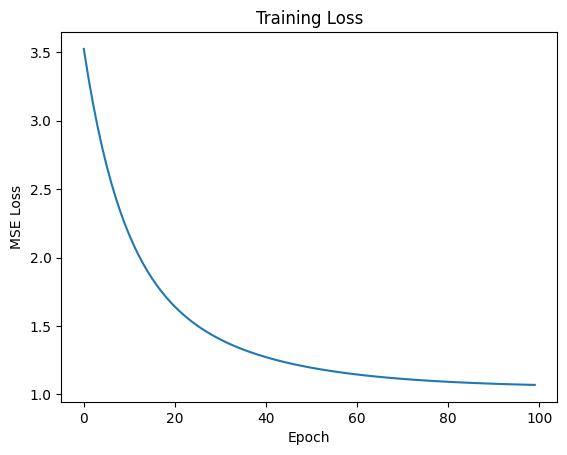

In [16]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# GPU & Dataset Intro

# Exercise 4: Implement Linear Regression from Scratch (PyTorch or NumPy)
- y = 3x + 2
- Compare learning rates [0.001, 0.01, 0.1]
- Use Adam optimizer
- Fit nonlinear function y = 2x^2 + 1


--- Training with Learning Rate: 0.001 ---
Epoch [50/200], Loss: 74.6880
Epoch [100/200], Loss: 72.0776
Epoch [150/200], Loss: 69.5359
Epoch [200/200], Loss: 67.0617
Target: W=3, b=2
Result: Learned W: 0.353, Learned b: -0.683

--- Training with Learning Rate: 0.01 ---
Epoch [50/200], Loss: 78.6851
Epoch [100/200], Loss: 55.8982
Epoch [150/200], Loss: 38.6379
Epoch [200/200], Loss: 25.9440
Target: W=3, b=2
Result: Learned W: 1.299, Learned b: 1.037

--- Training with Learning Rate: 0.1 ---
Epoch [50/200], Loss: 0.5053
Epoch [100/200], Loss: 0.2443
Epoch [150/200], Loss: 0.2407
Epoch [200/200], Loss: 0.2407
Target: W=3, b=2
Result: Learned W: 2.997, Learned b: 2.030


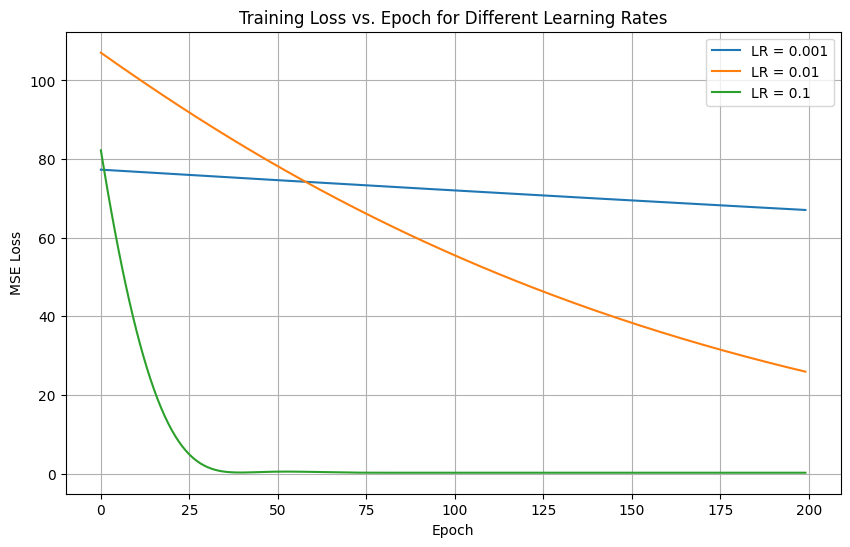

In [17]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(42)

X_linear = torch.linspace(-5, 5, 100).unsqueeze(1)
y_linear = 3 * X_linear + 2 + torch.randn(X_linear.size()) * 0.5

def train_model(learning_rate):
    print(f"\n--- Training with Learning Rate: {learning_rate} ---")

    model = nn.Linear(1, 1)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    epochs = 200

    for epoch in range(epochs):
        y_predicted = model(X_linear)
        loss = loss_function(y_predicted, y_linear)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    learned_W, learned_b = model.parameters()
    print(f"Target: W=3, b=2")
    print(f"Result: Learned W: {learned_W[0].item():.3f}, Learned b: {learned_b.item():.3f}")

    return losses

learning_rates = [0.001, 0.01, 0.1]
all_losses = {}

for lr in learning_rates:
    all_losses[lr] = train_model(lr)

plt.figure(figsize=(10, 6))
for lr, losses in all_losses.items():
    plt.plot(losses, label=f'LR = {lr}')

plt.title("Training Loss vs. Epoch for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/1000], Loss: 4.6667
Epoch [200/1000], Loss: 2.1149
Epoch [300/1000], Loss: 1.3867
Epoch [400/1000], Loss: 1.1445
Epoch [500/1000], Loss: 1.0319
Epoch [600/1000], Loss: 0.9671
Epoch [700/1000], Loss: 0.9377
Epoch [800/1000], Loss: 0.9264
Epoch [900/1000], Loss: 0.9199
Epoch [1000/1000], Loss: 0.9169


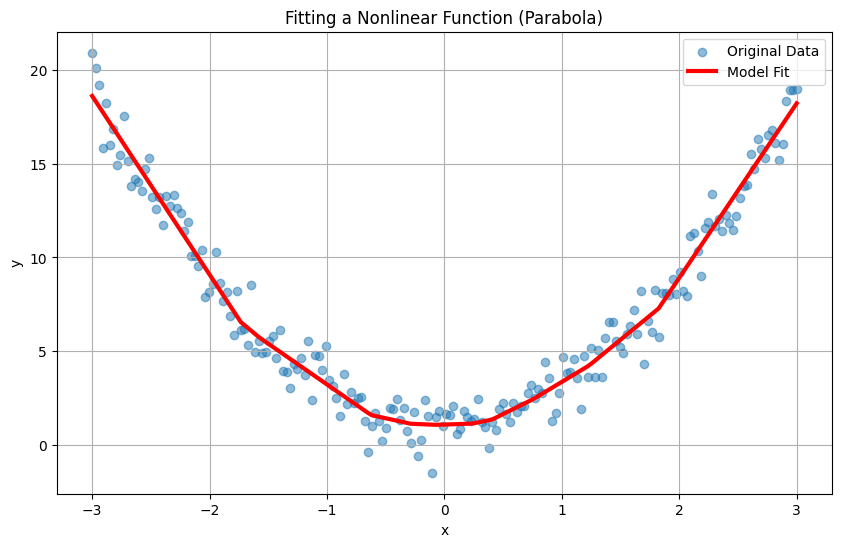

In [18]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(42)

X_nonlinear = torch.linspace(-3, 3, 200).unsqueeze(1)
y_nonlinear = 2 * X_nonlinear**2 + 1 + torch.randn(X_nonlinear.size())

model_nonlinear = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_nonlinear.parameters(), lr=0.01)

epochs = 1000
losses_nonlinear = []

for epoch in range(epochs):
    y_predicted = model_nonlinear(X_nonlinear)
    loss = loss_function(y_predicted, y_nonlinear)
    losses_nonlinear.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

predicted_final = model_nonlinear(X_nonlinear).detach()

plt.figure(figsize=(10, 6))
plt.scatter(X_nonlinear.numpy(), y_nonlinear.numpy(), label='Original Data', alpha=0.5)
plt.plot(X_nonlinear.numpy(), predicted_final.numpy(), label='Model Fit', color='red', linewidth=3)
plt.title("Fitting a Nonlinear Function (Parabola)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()